In [55]:
import pandas as pd
data= pd.read_csv("sampled_df.csv")
data.head(10)

,Title,Year,Director,Actors,Rating,Runtime,Genre,Release_Date,Plot_Summary,words_movies,headline,category,short_description,authors,date,words_news
0,The SpongeBob Movie: Sponge Out of Water,2015,"Directors:Paul Tibbitt, Mike Mitchell","Tom Kenny, Antonio Banderas, Bill Fagerbakke, ...",6.0,92,Animation,2015-02-06,When a diabolical pirate above the sea steals ...,diabolical pirate sea steals secret formula ne...,Fighting the New Stupidity,"Keith M. Parsons, ContributorPhilosopher, hist...",Vaccines are a great triumph of the human inte...,Vaccines are a great triumph of the human inte...,2015-02-06,Vaccines great triumph human intellect ancient...
1,Entourage,2015,Doug Ellin,"Adrian Grenier, Kevin Connolly, Jerry Ferrara,...",6.5,104,Comedy,2015-07-18,Film star Vince Chase navigates the vapid terr...,navigates vapid terrain close circle friends t...,Harper Lee's 'Watchmen' Infused With Religious...,"Cathy Lynn Grossman, Religion News Service",(RNS) Harper Lee’s “new” book “Go Set a Watchm...,(RNS) Harper Lee’s “new” book “Go Set a Watchm...,2015-07-18,new book Go infused religious life Christian m...
2,Baywatch,2017,Seth Gordon,"Dwayne Johnson, Zac Efron, Alexandra Daddario,...",5.5,116,Action,2017-05-25,Devoted lifeguard Mitch Buchannon butts heads ...,Devoted lifeguard butts heads brash new recrui...,39 Tweets That Capture How Much Parents Love Wine,Caroline Bologna,Happy National Wine Day!,Happy National Wine Day!,2017-05-25,Happy
3,Mute,2018,Duncan Jones,"Alexander Skarsgård, Paul Rudd, Justin Theroux...",5.4,126,Mystery,2018-02-23,A mute bartender goes up against his city's ga...,mute bartender goes city gangsters effort find...,"Despite Attacking Renewables, Trump Team Says ...",Chris D'Angelo,"""As long as it’s made in America, I’m good wit...","""As long as it’s made in America, I’m good wit...",2018-02-23,As long made ’m good said
4,Honeymoon,2014,Leigh Janiak,"Rose Leslie, Harry Treadaway, Ben Huber, Hanna...",5.7,87,Drama,2014-09-12,A newlywed couple finds their lake-country hon...,newlywed couple finds lake country honeymoon d...,"Golf Teacher Admits To Molesting Kids, Trying ...",Ed Mazza,NaN,NaN,2014-09-12,NaN
5,Split,2016,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",7.3,117 min,"Horror, Thriller",2017-01-20,Three girls are kidnapped by a man with a diag...,girls kidnapped man diagnosed distinct persona...,Newspaper Front Pages Usher In Uncertainty Of ...,Willa Frej,"""We have no idea what this guy's gonna do,"" on...","""We have no idea what this guy's gonna do,"" on...",2017-01-20,have idea guy gon do cover reads
6,Scooby-Doo! WrestleMania Mystery,2014,"Brandon Vietti, Seung-goo Jo, Young Won Jung, ...","Frank Welker, Mindy Cohn, Grey Griffin, Matthe...",7.4,84 min,"Animation, Comedy, Family, Mystery",2014-03-25,Shaggy and Scooby win tickets for a WWE City t...,win tickets trip go there attacked huge monste...,Gillian Georges: A Bar Star on the Rise,"Jose Martinez, Contributor\nJose Martinez is a...",Determined to eventually open her own restaura...,Determined to eventually open her own restaura...,2014-03-25,Determined eventually open own restaurant mayb...
7,Scooby-Doo! Music of the Vampire,2012,David Block,"Frank Welker, Matthew Lillard, Grey Griffin, M...",7.8,79 min,"Family, Animation, Mystery, Adventure, Comedy,...",2012-03-13,When Daphne becomes the star of a vampire film...,becomes star vampire film production thrown ch...,Do You Eat When You're Bored?,"Irene Rubaum-Keller, Contributor\nAuthor, Mili...","If you eat when you're bored, you are not alon...","If you eat when you're bored, you are not alon...",2012-03-13,eat bored alone Eating fun pleasure do procras...
8,The Rewrite,2014,Marc Lawrence,"Hugh Grant, Whit Baldwin, Vanessa Wasche",6.0,107 min,"Romance, Comedy",2015-02-13,An Oscar-winning writer in a slump leaves Holl...,Oscar winning writer slump leaves teach screen...,"Health Is Progress, Not Perfection","Erin Bahadur, Contributorrecovering addict, cr...","For me, hea

In [56]:
data_sub= data[["Year", "Runtime", "Rating"]]
data_sub.head(10)

,Year,Runtime,Rating
0,2015,92,6.0
1,2015,104,6.5
2,2017,116,5.5
3,2018,126,5.4
4,2014,87,5.7
5,2016,117 min,7.3
6,2014,84 min,7.4
7,2012,79 min,7.8
8,2014,107 min,6.0
9,2014,22 min,7.0


In [57]:
# Function to check for non-numeric values in a column
def has_non_numeric(column):
    return any(pd.to_numeric(column, errors='coerce').isna())

# Check each column for non-numeric data
for column in data_sub.columns:
    if has_non_numeric(data[column]):
        print(f"'{column}' contains non-numeric data.")

'Runtime' contains non-numeric data.


In [58]:
# Remove "min" and retain only numbers
data_sub['Runtime'] = data_sub['Runtime'].str.replace(r'\D', '', regex=True)

# Display the modified DataFrame
data_sub.head(10)

C:\Users\asuri\AppData\Local\Temp\ipykernel_27128\1029622976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['Runtime'] = data_sub['Runtime'].str.replace(r'\D', '', regex=True)


,Year,Runtime,Rating
0,2015,92,6.0
1,2015,104,6.5
2,2017,116,5.5
3,2018,126,5.4
4,2014,87,5.7
5,2016,117,7.3
6,2014,84,7.4
7,2012,79,7.8
8,2014,107,6.0
9,2014,22,7.0


In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
import matplotlib.pyplot as plt


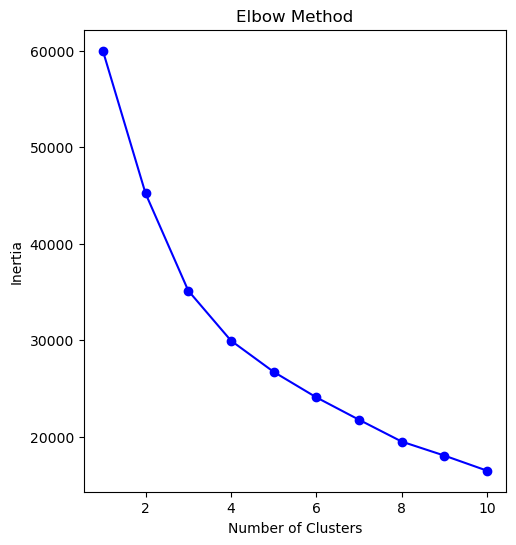

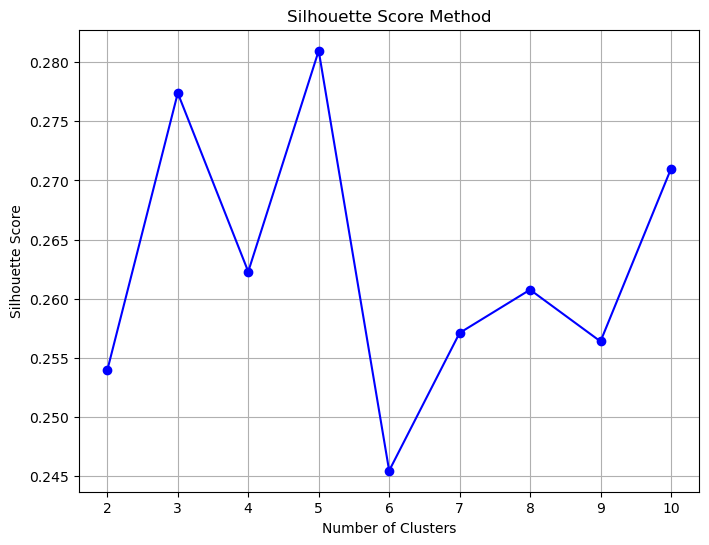

<Figure size 640x480 with 0 Axes>

          Year     Runtime    Rating
0  2016.680930   96.819147  5.821318
1  2013.110133   97.712886  6.367605
2  2015.456066  128.290441  7.299357
           Rating
cluster          
0        5.824746
1        6.365404
2        7.301032


C:\Users\asuri\AppData\Local\Temp\ipykernel_27128\2452530283.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['cluster'] = clusters


In [25]:
# Select only the numeric variables for clustering
X = data_sub[['Year', 'Runtime', 'Rating']]

# Standardize the data (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the number of clusters using the Elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method to determine the optimal number of clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

from sklearn.metrics import silhouette_score

# Determine the number of clusters using the Silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette scores to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.grid(True)
plt.show()

# Based on the Silhouette score, choose an appropriate number of clusters (e.g., the one with the highest score)


plt.tight_layout()
plt.show()

# Based on both methods, choose an appropriate number of clusters (e.g., 3 based on the Elbow method)

# Perform K-means clustering with the chosen number of clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to your original data_sub
data_sub['cluster'] = clusters

# Analyze the results
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Year', 'Runtime', 'Rating'])
print(cluster_centers_df)

# Calculate and print the mean values for each cluster
cluster_means = data_sub.groupby('cluster').mean()
print(cluster_means)

In [26]:
from sklearn.metrics import pairwise_distances

# Values of k (number of clusters)
k_values = [2, 3, 4, 5]

# Distance metrics to be used
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine', 'correlation', 'jaccard', 'hamming', 'canberra']

# Iterate through k values and distance metrics
for k in k_values:
    for metric in distance_metrics:
        # Fit KMeans clustering model
        kmeans = KMeans(n_clusters=k, random_state=0)
        clusters = kmeans.fit_predict(X_scaled)
        
        # Calculate pairwise distances for the current metric
        distances = pairwise_distances(X_scaled, metric=metric)
        
        # Print the results
        print(f"K={k}, Metric={metric}:\n", distances)


K=2, Metric=euclidean:
 [[0.         0.73421468 1.47915826 ... 3.02493532 2.87971426 1.02391374]
 [0.73421468 0.         1.51257603 ... 2.30312862 2.281695   1.21625065]
 [1.47915826 1.51257603 0.         ... 2.98166345 2.31662501 2.02816712]
 ...
 [3.02493532 2.30312862 2.98166345 ... 0.         1.20537327 3.27565594]
 [2.87971426 2.281695   2.31662501 ... 1.20537327 0.         3.36217824]
 [1.02391374 1.21625065 2.02816712 ... 3.27565594 3.36217824 0.        ]]
K=2, Metric=manhattan:
 [[0.         1.03783973 2.48421883 ... 4.68820584 4.92466052 1.49274766]
 [1.03783973 0.         2.51632946 ... 3.65036611 3.8868208  1.86010132]
 [2.48421883 2.51632946 0.         ... 4.21745192 3.51039205 2.87850028]
 ...
 [4.68820584 3.65036611 4.21745192 ... 0.         1.73438518 5.51046743]
 [4.92466052 3.8868208  3.51039205 ... 1.73438518 0.         5.74692212]
 [1.49274766 1.86010132 2.87850028 ... 5.51046743 5.74692212 0.        ]]
K=2, Metric=chebyshev:
 [[0.         0.53497518 1.0057291  ... 2

C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


K=2, Metric=jaccard:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
K=2, Metric=hamming:
 [[0.         0.66666667 1.         ... 1.         1.         1.        ]
 [0.66666667 0.         1.         ... 1.         1.         1.        ]
 [1.         1.         0.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.         1.         1.        ]
 [1.         1.         1.         ... 1.         0.         1.        ]
 [1.         1.         1.         ... 1.         1.         0.        ]]
K=2, Metric=canberra:
 [[0.         1.77522885 2.27636735 ... 2.84488003 2.94232944 1.59465794]
 [1.77522885 0.         2.91591867 ... 2.77900114 2.83091994 2.53480941]
 [2.27636735 2.91591867 0.         ... 1.84259396 1.7319912  2.18901686]
 ...
 [2.84488003 2.77900114 1.84259396 ... 0.         0.76077517 3.        ]
 [2.94232944 2.83091994 1.7319912  .

C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


K=3, Metric=jaccard:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
K=3, Metric=hamming:
 [[0.         0.66666667 1.         ... 1.         1.         1.        ]
 [0.66666667 0.         1.         ... 1.         1.         1.        ]
 [1.         1.         0.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.         1.         1.        ]
 [1.         1.         1.         ... 1.         0.         1.        ]
 [1.         1.         1.         ... 1.         1.         0.        ]]
K=3, Metric=canberra:
 [[0.         1.77522885 2.27636735 ... 2.84488003 2.94232944 1.59465794]
 [1.77522885 0.         2.91591867 ... 2.77900114 2.83091994 2.53480941]
 [2.27636735 2.91591867 0.         ... 1.84259396 1.7319912  2.18901686]
 ...
 [2.84488003 2.77900114 1.84259396 ... 0.         0.76077517 3.        ]
 [2.94232944 2.83091994 1.7319912  .

C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


K=4, Metric=jaccard:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
K=4, Metric=hamming:
 [[0.         0.66666667 1.         ... 1.         1.         1.        ]
 [0.66666667 0.         1.         ... 1.         1.         1.        ]
 [1.         1.         0.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.         1.         1.        ]
 [1.         1.         1.         ... 1.         0.         1.        ]
 [1.         1.         1.         ... 1.         1.         0.        ]]
K=4, Metric=canberra:
 [[0.         1.77522885 2.27636735 ... 2.84488003 2.94232944 1.59465794]
 [1.77522885 0.         2.91591867 ... 2.77900114 2.83091994 2.53480941]
 [2.27636735 2.91591867 0.         ... 1.84259396 1.7319912  2.18901686]
 ...
 [2.84488003 2.77900114 1.84259396 ... 0.         0.76077517 3.        ]
 [2.94232944 2.83091994 1.7319912  .

C:\Users\asuri\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


K=5, Metric=jaccard:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
K=5, Metric=hamming:
 [[0.         0.66666667 1.         ... 1.         1.         1.        ]
 [0.66666667 0.         1.         ... 1.         1.         1.        ]
 [1.         1.         0.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.         1.         1.        ]
 [1.         1.         1.         ... 1.         0.         1.        ]
 [1.         1.         1.         ... 1.         1.         0.        ]]
K=5, Metric=canberra:
 [[0.         1.77522885 2.27636735 ... 2.84488003 2.94232944 1.59465794]
 [1.77522885 0.         2.91591867 ... 2.77900114 2.83091994 2.53480941]
 [2.27636735 2.91591867 0.         ... 1.84259396 1.7319912  2.18901686]
 ...
 [2.84488003 2.77900114 1.84259396 ... 0.         0.76077517 3.        ]
 [2.94232944 2.83091994 1.7319912  .

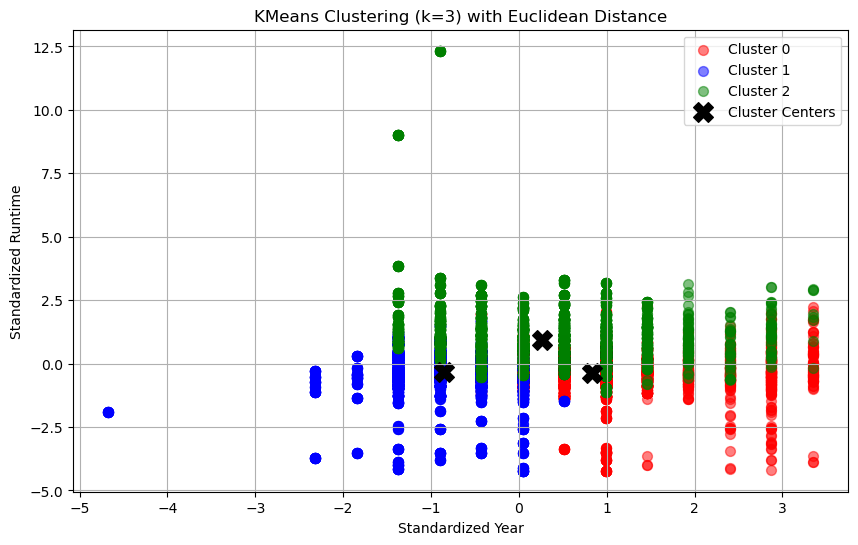

In [31]:
import matplotlib.pyplot as plt

# Fit KMeans clustering model with k=3 and Euclidean distance
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[clusters == 0, 0], X_scaled[clusters == 0, 1], s=50, c='red', label='Cluster 0', alpha=0.5)
plt.scatter(X_scaled[clusters == 1, 0], X_scaled[clusters == 1, 1], s=50, c='blue', label='Cluster 1', alpha=0.5)
plt.scatter(X_scaled[clusters == 2, 0], X_scaled[clusters == 2, 1], s=50, c='green', label='Cluster 2', alpha=0.5)

# Plot cluster centers
cluster_centers = kmeans.cluster_centers_
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='black', marker='X', label='Cluster Centers')

plt.title('KMeans Clustering (k=3) with Euclidean Distance')
plt.xlabel('Standardized Year')
plt.ylabel('Standardized Runtime')
plt.legend()
plt.grid(True)
plt.show()


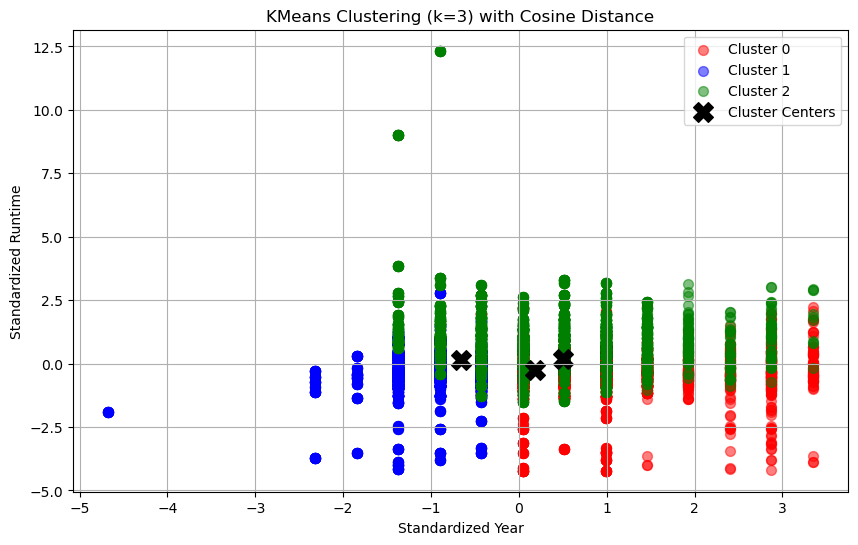

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(X_scaled)

# Fit KMeans clustering model with k=3 and cosine distance
kmeans_cosine = KMeans(n_clusters=3, random_state=0)
clusters_cosine = kmeans_cosine.fit_predict(cosine_sim)

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[clusters_cosine == 0, 0], X_scaled[clusters_cosine == 0, 1], s=50, c='red', label='Cluster 0', alpha=0.5)
plt.scatter(X_scaled[clusters_cosine == 1, 0], X_scaled[clusters_cosine == 1, 1], s=50, c='blue', label='Cluster 1', alpha=0.5)
plt.scatter(X_scaled[clusters_cosine == 2, 0], X_scaled[clusters_cosine == 2, 1], s=50, c='green', label='Cluster 2', alpha=0.5)

# Plot cluster centers
cluster_centers_cosine = kmeans_cosine.cluster_centers_
plt.scatter(cluster_centers_cosine[:, 0], cluster_centers_cosine[:, 1], s=200, c='black', marker='X', label='Cluster Centers')

plt.title('KMeans Clustering (k=3) with Cosine Distance')
plt.xlabel('Standardized Year')
plt.ylabel('Standardized Runtime')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\asuri\AppData\Local\Temp\ipykernel_27128\209769479.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['Year'] = pd.to_numeric(data_sub['Year'], errors='coerce')
C:\Users\asuri\AppData\Local\Temp\ipykernel_27128\209769479.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['Rating'] = pd.to_numeric(data_sub['Rating'], errors='coerce')
C:\Users\asuri\AppData\Local\Temp\ipykernel_27128\209769479.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

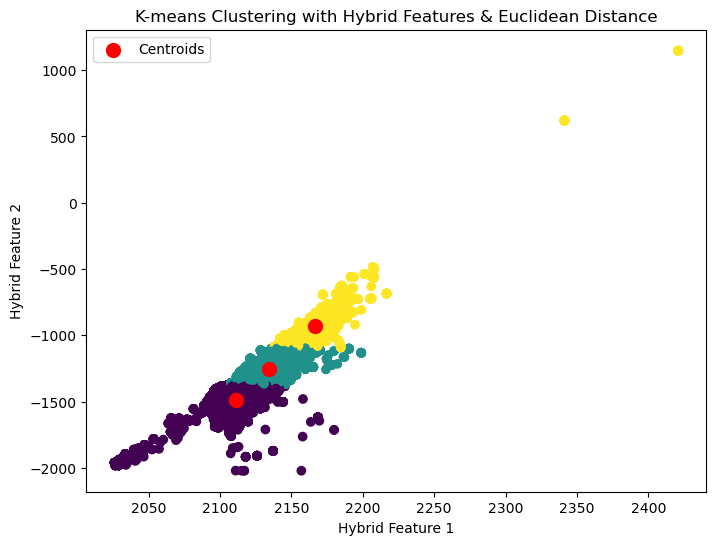

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Ensure the columns contain only numeric values
data_sub['Year'] = pd.to_numeric(data_sub['Year'], errors='coerce')
data_sub['Rating'] = pd.to_numeric(data_sub['Rating'], errors='coerce')

# Convert 'Runtime' to string and then clean it
data_sub['Runtime'] = data_sub['Runtime'].astype(str).str.replace(r'\D', '', regex=True)
data_sub['Runtime'] = pd.to_numeric(data_sub['Runtime'], errors='coerce')

# Drop rows with missing values
data_sub.dropna(inplace=True)

# Create hybrid features by combining the three numerical features
data_sub['hf1'] = data_sub['Runtime'] + data_sub['Rating'] + data_sub['Year']
data_sub['hf2'] = data_sub['Runtime'] * data_sub['Rating'] - data_sub['Year']

# Select the hybrid features for clustering
selected_features = data_sub[['hf1', 'hf2']].values

# Number of clusters
n_clusters = 3

# K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(selected_features)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(selected_features[:, 0], selected_features[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='red', label='Centroids')
plt.title('K-means Clustering with Hybrid Features & Euclidean Distance')
plt.xlabel('Hybrid Feature 1')
plt.ylabel('Hybrid Feature 2')
plt.legend()
plt.show()


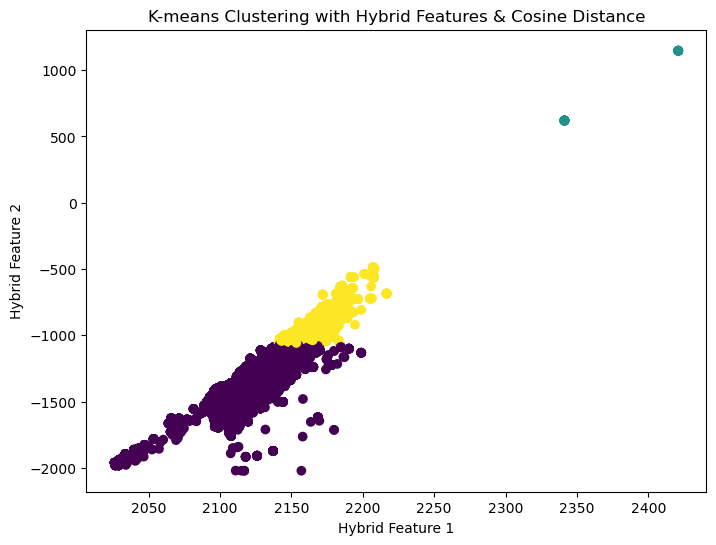

In [61]:
# Select the hybrid features for clustering
selected_features = data_sub[['hf1', 'hf2']].values

# Compute cosine similarities
cosine_similarities = cosine_similarity(selected_features)

# Number of clusters
n_clusters = 3

# K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(cosine_similarities)

# Get cluster labels
cluster_labels = kmeans.labels_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(selected_features[:, 0], selected_features[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering with Hybrid Features & Cosine Distance')
plt.xlabel('Hybrid Feature 1')
plt.ylabel('Hybrid Feature 2')
plt.show()

C:\Users\asuri\AppData\Local\Temp\ipykernel_27128\3244166818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['Year'] = pd.to_numeric(data_sub['Year'], errors='coerce')
C:\Users\asuri\AppData\Local\Temp\ipykernel_27128\3244166818.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['Runtime'] = pd.to_numeric(data_sub['Runtime'], errors='coerce')
C:\Users\asuri\AppData\Local\Temp\ipykernel_27128\3244166818.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

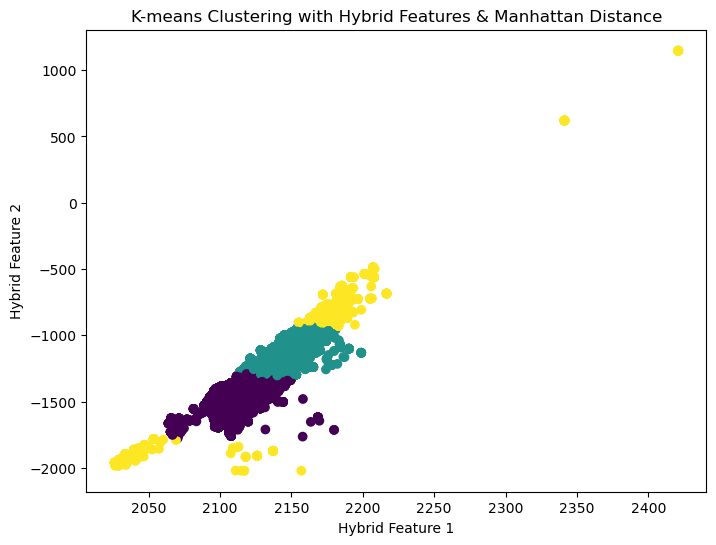

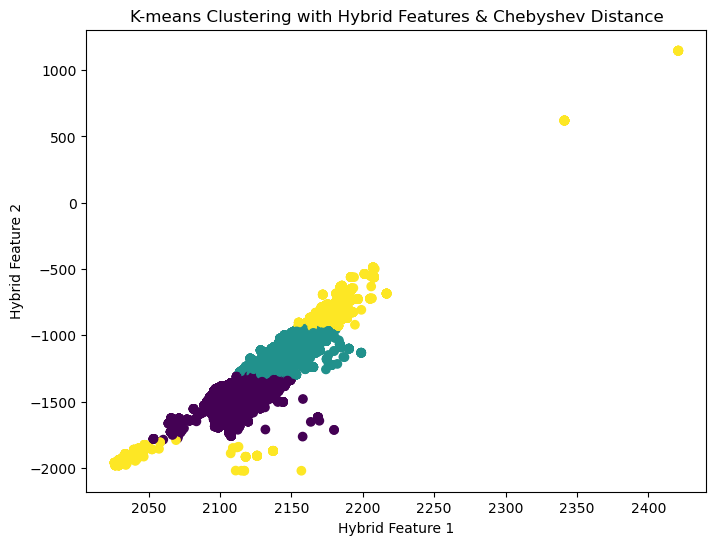

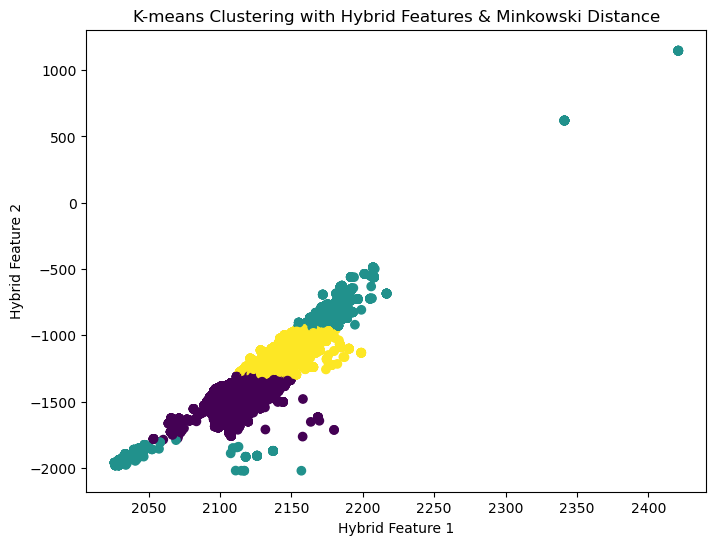

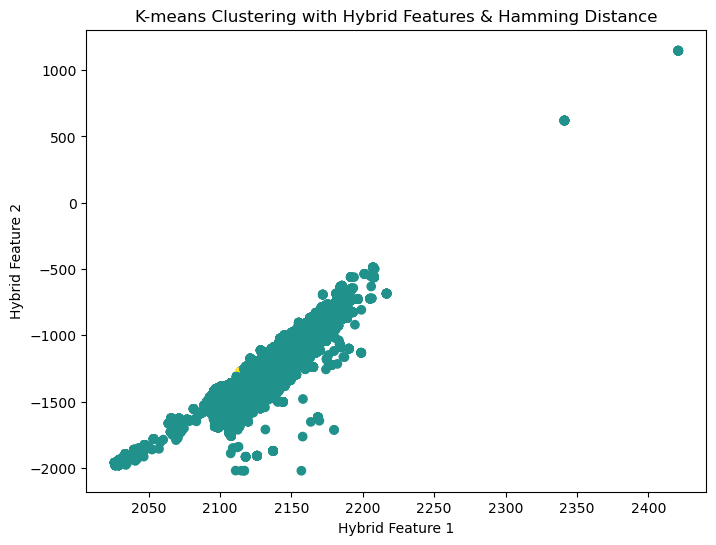

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Ensure the columns contain only numeric values
data_sub['Year'] = pd.to_numeric(data_sub['Year'], errors='coerce')
data_sub['Runtime'] = pd.to_numeric(data_sub['Runtime'], errors='coerce')
data_sub['Rating'] = pd.to_numeric(data_sub['Rating'], errors='coerce')

# Drop rows with missing values
data_sub.dropna(inplace=True)

# Create hybrid features by combining the three numerical features
#data_sub['hf1'] = data_sub['Runtime'] + data_sub['Year'] + data_sub['Rating']
#data_sub['hf2'] = data_sub['Runtime'] * data_sub['Year'] - data_sub['Rating']

# Select the hybrid features for clustering
selected_features = data_sub[['hf1', 'hf2']].values

# Number of clusters
n_clusters = 3

# Define distance metrics
distance_metrics = ['manhattan', 'chebyshev', 'minkowski', 'hamming']

# Perform K-means clustering for each distance metric
for metric in distance_metrics:
    # Compute pairwise distances based on the selected metric
    pairwise_dist = pairwise_distances(selected_features, metric=metric)

    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(pairwise_dist)

    # Get cluster labels
    cluster_labels = kmeans.labels_

    # Create a scatter plot to visualize the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(selected_features[:, 0], selected_features[:, 1], c=cluster_labels, cmap='viridis')
    plt.title(f'K-means Clustering with Hybrid Features & {metric.capitalize()} Distance')
    plt.xlabel('Hybrid Feature 1')
    plt.ylabel('Hybrid Feature 2')
    plt.show()


In [ ]:
#K=2

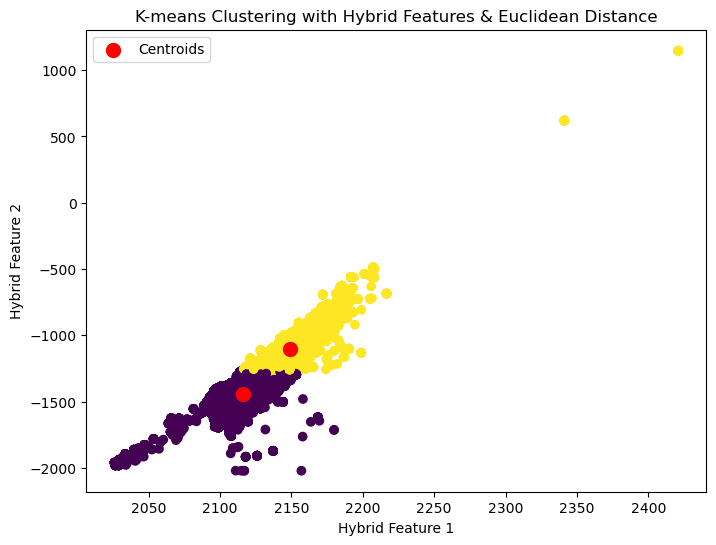

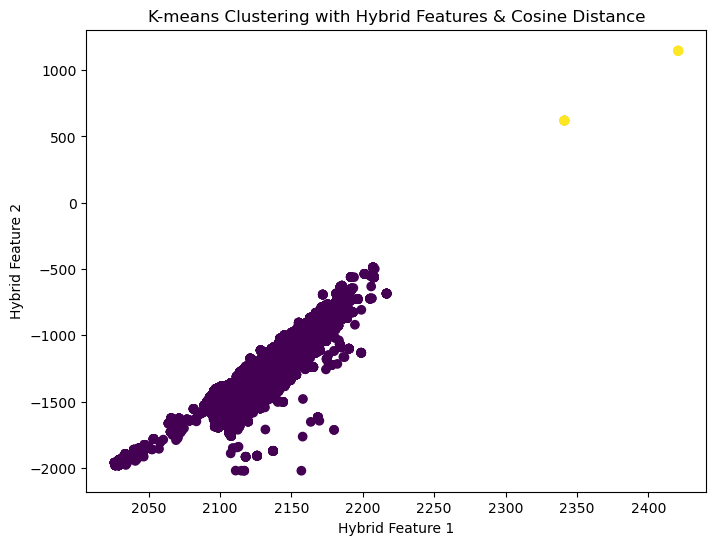

In [63]:
# Number of clusters
n_clusters = 2

# K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(selected_features)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(selected_features[:, 0], selected_features[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='red', label='Centroids')
plt.title('K-means Clustering with Hybrid Features & Euclidean Distance')
plt.xlabel('Hybrid Feature 1')
plt.ylabel('Hybrid Feature 2')
plt.legend()
plt.show()


# Select the hybrid features for clustering
selected_features = data_sub[['hf1', 'hf2']].values

# Compute cosine similarities
cosine_similarities = cosine_similarity(selected_features)

# K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(cosine_similarities)

# Get cluster labels
cluster_labels = kmeans.labels_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(selected_features[:, 0], selected_features[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering with Hybrid Features & Cosine Distance')
plt.xlabel('Hybrid Feature 1')
plt.ylabel('Hybrid Feature 2')
plt.show()

In [ ]:
#K=4

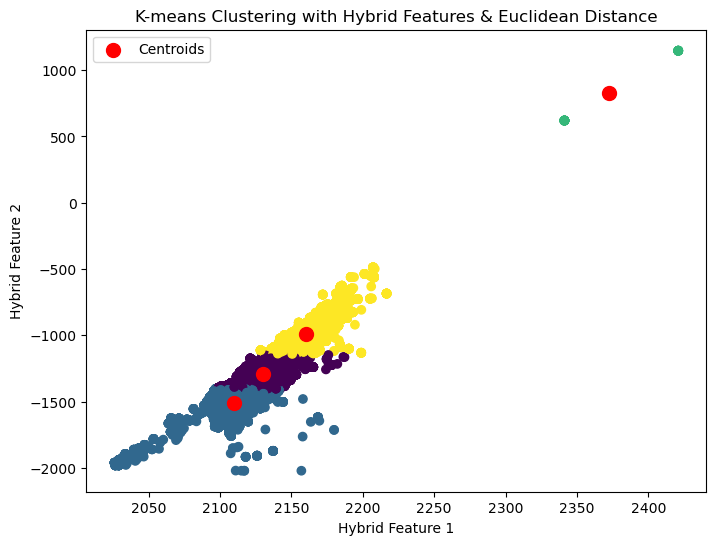

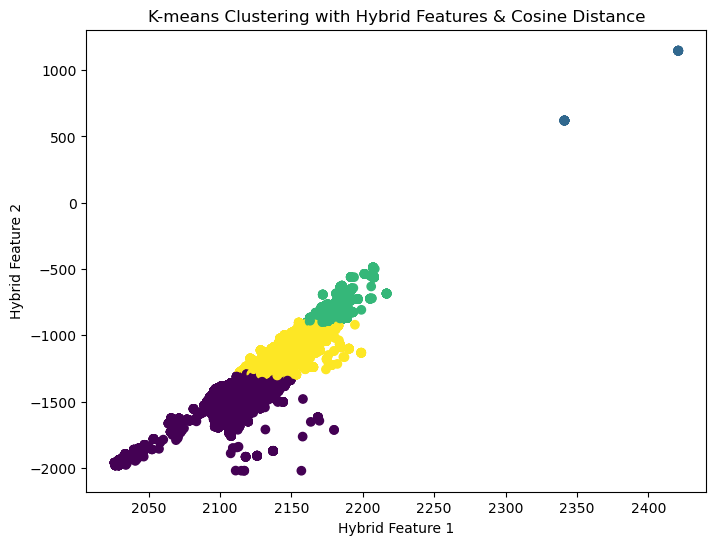

In [64]:
# Number of clusters
n_clusters = 4

# K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(selected_features)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(selected_features[:, 0], selected_features[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='red', label='Centroids')
plt.title('K-means Clustering with Hybrid Features & Euclidean Distance')
plt.xlabel('Hybrid Feature 1')
plt.ylabel('Hybrid Feature 2')
plt.legend()
plt.show()


# Select the hybrid features for clustering
selected_features = data_sub[['hf1', 'hf2']].values

# Compute cosine similarities
cosine_similarities = cosine_similarity(selected_features)

# K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(cosine_similarities)

# Get cluster labels
cluster_labels = kmeans.labels_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(selected_features[:, 0], selected_features[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering with Hybrid Features & Cosine Distance')
plt.xlabel('Hybrid Feature 1')
plt.ylabel('Hybrid Feature 2')
plt.show()

C:\Users\asuri\AppData\Local\Temp\ipykernel_27128\294957982.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['Year'] = pd.to_numeric(data_sub['Year'], errors='coerce')
C:\Users\asuri\AppData\Local\Temp\ipykernel_27128\294957982.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['Runtime'] = pd.to_numeric(data_sub['Runtime'], errors='coerce')
C:\Users\asuri\AppData\Local\Temp\ipykernel_27128\294957982.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

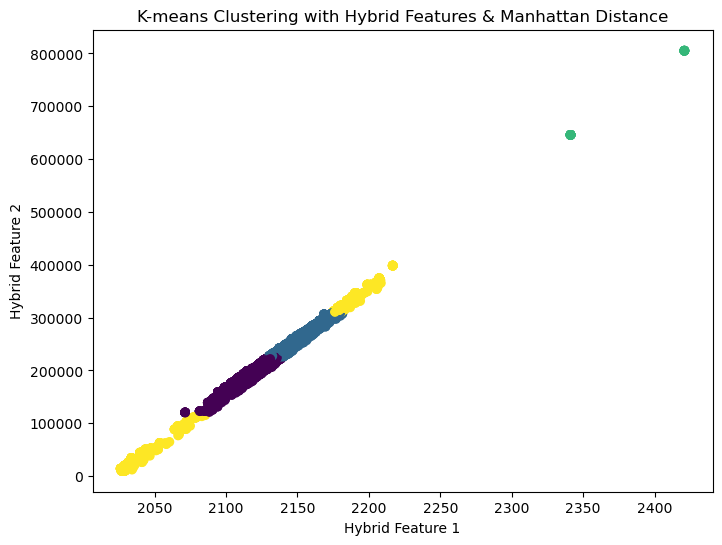

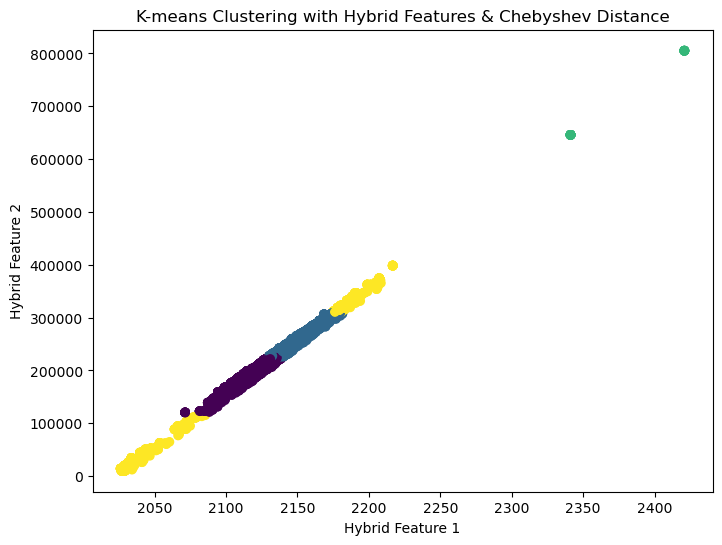

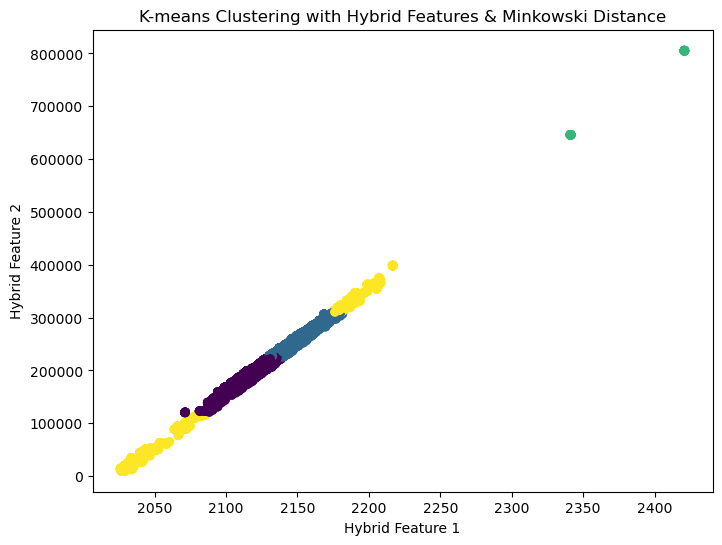

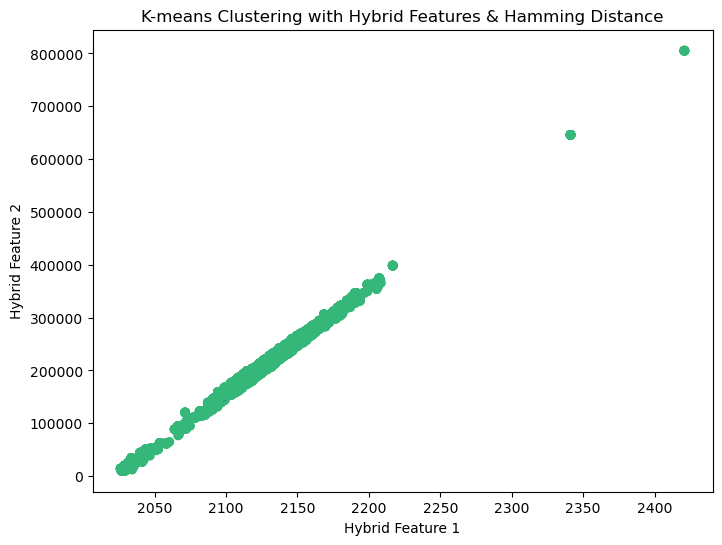

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Ensure the columns contain only numeric values
data_sub['Year'] = pd.to_numeric(data_sub['Year'], errors='coerce')
data_sub['Runtime'] = pd.to_numeric(data_sub['Runtime'], errors='coerce')
data_sub['Rating'] = pd.to_numeric(data_sub['Rating'], errors='coerce')

# Drop rows with missing values
data_sub.dropna(inplace=True)

# Create hybrid features by combining the three numerical features
data_sub['hf1'] = data_sub['Runtime'] + data_sub['Year'] + data_sub['Rating']
data_sub['hf2'] = data_sub['Runtime'] * data_sub['Year'] - data_sub['Rating']

# Select the hybrid features for clustering
selected_features = data_sub[['hf1', 'hf2']].values

# Number of clusters
n_clusters = 4

# Define distance metrics
distance_metrics = ['manhattan', 'chebyshev', 'minkowski', 'hamming']

# Perform K-means clustering for each distance metric
for metric in distance_metrics:
    # Compute pairwise distances based on the selected metric
    pairwise_dist = pairwise_distances(selected_features, metric=metric)

    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(pairwise_dist)

    # Get cluster labels
    cluster_labels = kmeans.labels_

    # Create a scatter plot to visualize the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(selected_features[:, 0], selected_features[:, 1], c=cluster_labels, cmap='viridis')
    plt.title(f'K-means Clustering with Hybrid Features & {metric.capitalize()} Distance')
    plt.xlabel('Hybrid Feature 1')
    plt.ylabel('Hybrid Feature 2')
    plt.show()


In [ ]:
#k=5

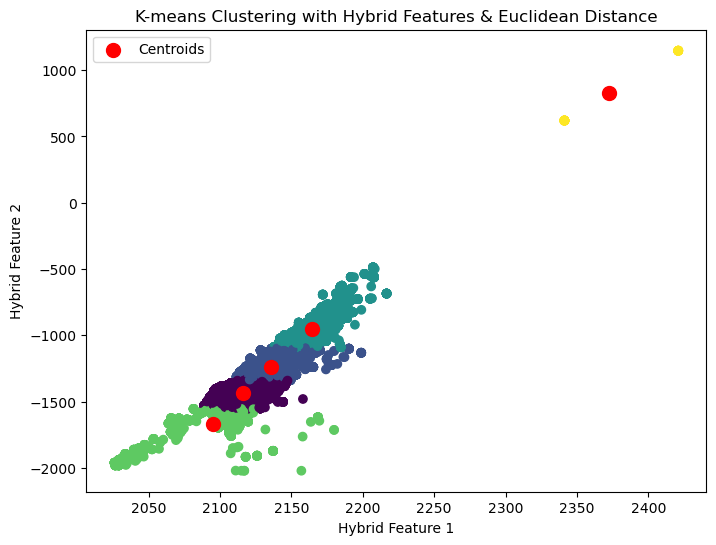

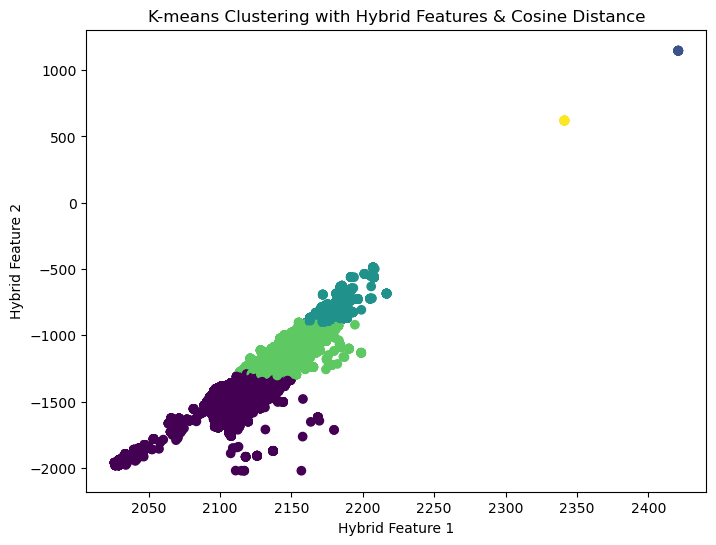

In [51]:
# Number of clusters
n_clusters = 5

# K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(selected_features)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(selected_features[:, 0], selected_features[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='red', label='Centroids')
plt.title('K-means Clustering with Hybrid Features & Euclidean Distance')
plt.xlabel('Hybrid Feature 1')
plt.ylabel('Hybrid Feature 2')
plt.legend()
plt.show()

# Compute cosine similarities
cosine_similarities = cosine_similarity(selected_features)

# K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(cosine_similarities)

# Get cluster labels
cluster_labels = kmeans.labels_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(selected_features[:, 0], selected_features[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering with Hybrid Features & Cosine Distance')
plt.xlabel('Hybrid Feature 1')
plt.ylabel('Hybrid Feature 2')
plt.show()

C:\Users\asuri\AppData\Local\Temp\ipykernel_27128\4186750408.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['Year'] = pd.to_numeric(data_sub['Year'], errors='coerce')
C:\Users\asuri\AppData\Local\Temp\ipykernel_27128\4186750408.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['Runtime'] = pd.to_numeric(data_sub['Runtime'], errors='coerce')
C:\Users\asuri\AppData\Local\Temp\ipykernel_27128\4186750408.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

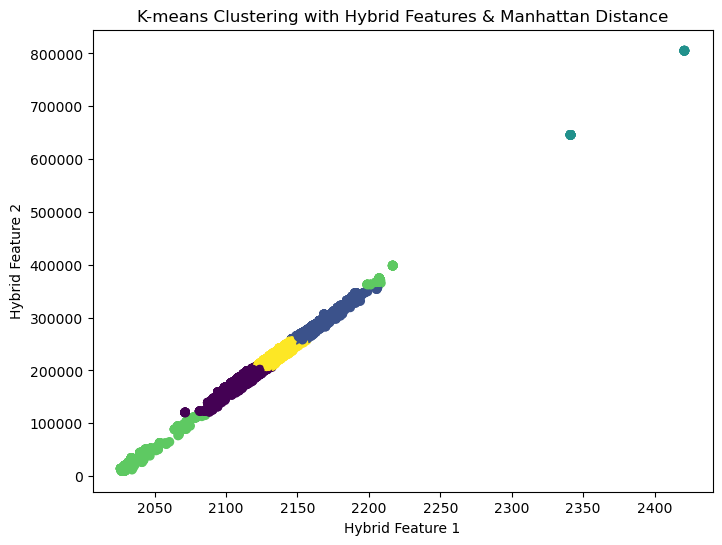

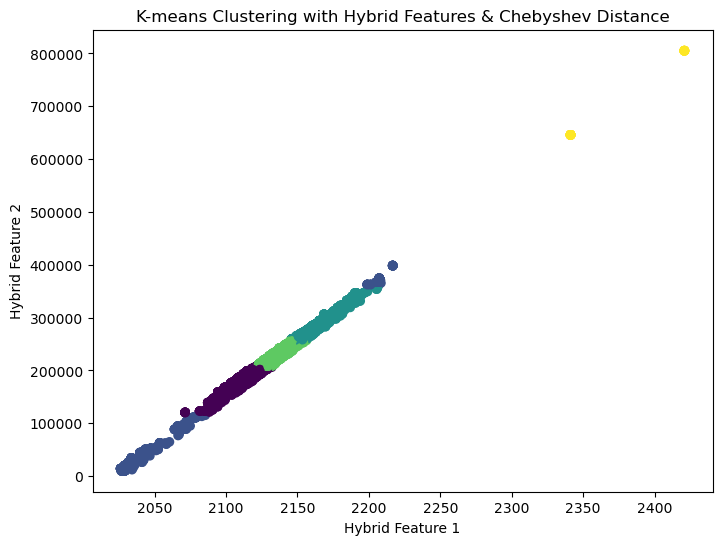

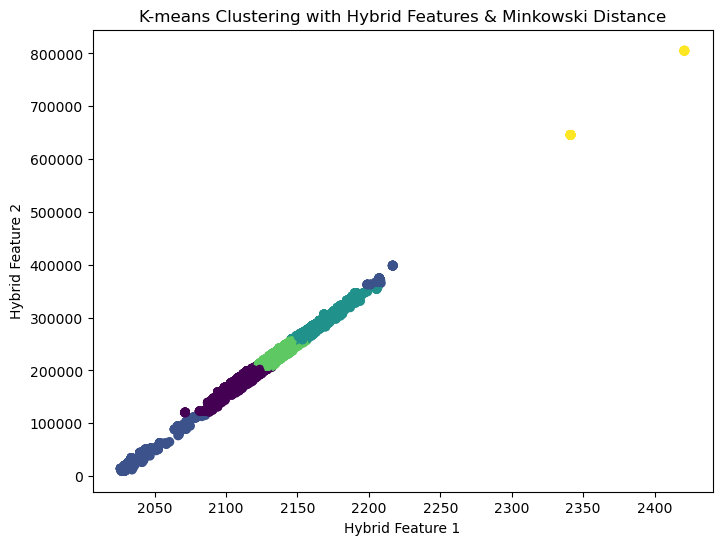

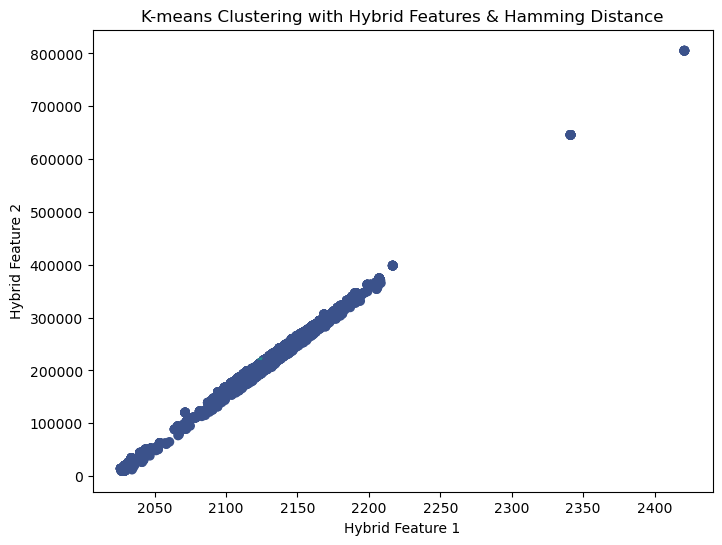

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

# Ensure the columns contain only numeric values
data_sub['Year'] = pd.to_numeric(data_sub['Year'], errors='coerce')
data_sub['Runtime'] = pd.to_numeric(data_sub['Runtime'], errors='coerce')
data_sub['Rating'] = pd.to_numeric(data_sub['Rating'], errors='coerce')

# Drop rows with missing values
data_sub.dropna(inplace=True)

# Create hybrid features by combining the three numerical features
data_sub['hf1'] = data_sub['Runtime'] + data_sub['Year'] + data_sub['Rating']
data_sub['hf2'] = data_sub['Runtime'] * data_sub['Year'] - data_sub['Rating']

# Select the hybrid features for clustering
selected_features = data_sub[['hf1', 'hf2']].values

# Number of clusters
n_clusters = 5

# Define distance metrics
distance_metrics = ['manhattan', 'chebyshev', 'minkowski', 'hamming']

# Perform K-means clustering for each distance metric
for metric in distance_metrics:
    # Compute pairwise distances based on the selected metric
    pairwise_dist = pairwise_distances(selected_features, metric=metric)

    # K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(pairwise_dist)

    # Get cluster labels
    cluster_labels = kmeans.labels_

    # Create a scatter plot to visualize the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(selected_features[:, 0], selected_features[:, 1], c=cluster_labels, cmap='viridis')
    plt.title(f'K-means Clustering with Hybrid Features & {metric.capitalize()} Distance')
    plt.xlabel('Hybrid Feature 1')
    plt.ylabel('Hybrid Feature 2')
    plt.show()
